In [1]:
import pandas as pd

### clean the pages json

In [2]:
# the columns in trail_info dataset
columns = ['activities', 'area_id', 'area_name', 'avgRating', 'completedCount',
       'difficulty', 'duration', 'elevationGain', 'elevationMax',
       'elevationStart', 'features', 'length', 'obstacles', 'overview',
       'photoCount', 'popularity', 'reviewCount', 'rountType', 'trackCount',
       'trailId', 'trail_name', "longitude", "latitude"]

In [ ]:
p1 = pd.read_json("data/page_1.json", typ = "series")

In [ ]:
p1.trails[0].keys()

In [ ]:
p1.trails[0]["location"]

In [3]:
def decode_trails(raw, packed):
    for trail in raw:
        new_dict = dict()
        
        # names and id
        if (trail["area"] != None):
            new_dict["area_id"] = trail["area"]["id"]
            new_dict["area_name"] = trail["area"]["name"]
        else: 
            new_dict["area_id"] = None
            new_dict["area_name"] = None
        # deal with attributes
        attributes = trail["attributes"]
        attr_keys = attributes.keys()
        for key in attr_keys:
            tmp = []
            for i in range(len(attributes[key])):
                tmp.append(attributes[key][i]["name"])
            new_dict[key] = tmp
        
        new_dict["avgRating"] = trail["avgRating"]
        new_dict["overview"] = trail["overview"]
        # geo stats
        new_dict["elevationGain"] = trail["trailGeoStats"]["elevationGain"]
        new_dict["elevationMax"] = trail["trailGeoStats"]["elevationMax"]
        new_dict["elevationStart"] = trail["trailGeoStats"]["elevationStart"]
        new_dict["length"] = trail["trailGeoStats"]["length"]
        
        new_dict["trail_name"] = trail["slug"]
        new_dict["popularity"] = trail["popularity"]
        new_dict["trailId"] = trail["id"]
        
        new_dict["latitude"] = trail["location"]["latitude"]
        new_dict["longitude"] = trail["location"]["longitude"]
        
        new_dict["completedCount"] = trail["trailCounts"]['completedCount']
        new_dict["photoCount"] = trail["trailCounts"]['photoCount']  
        new_dict["reviewCount"] = trail["trailCounts"]['reviewCount']
        new_dict["trackCount"] = trail["trailCounts"]['trackCount']
        
        new_dict["rountType"] = trail["routeType"]["name"]
        new_dict["difficulty"] = trail["defaultActivityStats"]["difficulty"]
        new_dict["duration"] = trail["defaultActivityStats"]["duration"]
        
        packed.append(new_dict)
    return packed

In [4]:
pages = [1,2,4,5,6,7,10]
trail_info =  pd.DataFrame(columns=columns)
for page in pages:
    filename = "data/page_" + str(page) + ".json"
    print(filename)
    tmp_data = pd.read_json(filename, typ='series')
    tmp_new = []
    tmp_new = decode_trails(tmp_data.trails, tmp_new)
    tmp_df = pd.DataFrame(tmp_new)
    trail_info = trail_info.append(tmp_df)

data/page_1.json
data/page_2.json
data/page_4.json
data/page_5.json
data/page_6.json
data/page_7.json
data/page_10.json


In [5]:
import matplotlib.pyplot as plt

Text(0.5,0,'difficulty')

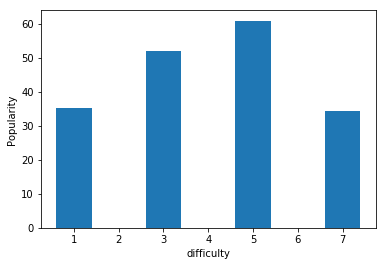

In [6]:
plt.bar(trail_info["difficulty"], trail_info["popularity"])
plt.ylabel('Popularity')
plt.xlabel('difficulty')

Text(0.5,0,'review counts')

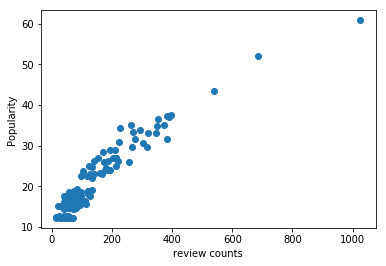

In [7]:
plt.scatter(trail_info["reviewCount"], trail_info["popularity"])
plt.ylabel('Popularity')
plt.xlabel('review counts')

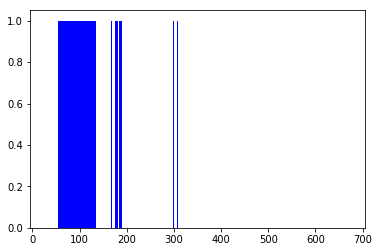

In [8]:
num_bins = 5
n, bins, patches = plt.hist(trail_info["reviewCount"][1:], num_bins, facecolor='blue')
plt.show()

In [9]:
trail_info.describe()

,area_id,avgRating,duration,elevationGain,elevationMax,elevationStart,latitude,length,longitude,popularity
count,1.540000e+02,168.000000,131.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000
mean,1.012918e+07,4.339286,12086.106870,407.916743,614.092171,329.136829,42.646481,9252.74706,-74.469389,19.680755
std,1.927577e+04,0.301302,7887.335084,386.322116,441.664459,224.239529,1.173407,6738.43100,1.188032,7.859310
min,1.011339e+07,3.500000,900.000000,0.914400,36.880800,0.914400,40.708420,321.86800,-78.551000,12.210500
25%,1.011692e+07,4.000000,7200.000000,118.110000,296.189400,126.568200,41.483850,4184.28400,-74.371860,15.031600
50%,1.011794e+07,4.500000,10800.000000,289.407600,433.425600,319.735200,42.588035,7644.36500,-74.022175,16.569500
75%,1.015680e+07,4.500000,16200.000000,581.253600,886.510800,528.142200,43.766567,11466.54750,-73.841093,23.161550
max,1.016338e+07,5.000000,43200.000000,2673.705600,1625.803200,784.860000,44.723660,34922.67800,-73.014960,60.831000


In [21]:
# correlation matrix
import seaborn as sns

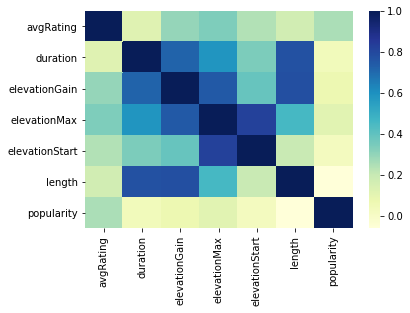

In [22]:
corr_cols = ['avgRating', 'completedCount',
       'difficulty', 'duration', 'elevationGain', 'elevationMax',
       'elevationStart',  'length',
       'photoCount', 'popularity', 'reviewCount', 'trackCount']
corr = trail_info[corr_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu")

### clean the reviews dataset 

In [12]:
reviews = pd.read_json("data/review.json", typ = 'series')

In [13]:
reviews.trail_reviews[0].keys()

dict_keys(['date', 'comment', 'weather', 'trailAvgRating', 'conditions', 'difficulty', 'associatedRecording', 'trailId', 'metadata', 'id', 'activity', 'duration', 'rating', 'length', 'visitorUsage', 'user'])

In [14]:
reviews.trail_reviews[2]["date"]

'2018-02-27T00:00:00Z'

In [15]:
review_clean = []
for review in reviews.trail_reviews:
    new_dict = dict()
    new_dict["date"] = review["date"]
    new_dict["comment"] = review["comment"]
    new_dict["review_rating"] = review["rating"]
    new_dict["trailId"] = review["trailId"]
    review_clean.append(new_dict)

In [16]:
review_clean = pd.DataFrame(review_clean)

In [17]:
review_clean

,comment,date,review_rating,trailId
0,Incredible hike! A little chilly with some bru...,2018-03-17T00:00:00Z,5,10029098
1,Hard but rewarding. We didn’t even finish this...,2018-03-01T00:00:00Z,5,10029098
2,Some pretty good climbing,2018-02-27T00:00:00Z,5,10029098
3,"Amazing day! A little tough for the kids, but...",2018-02-20T00:00:00Z,5,10029098
4,"First time there, won’t be my last!! Pretty ha...",2018-02-19T00:00:00Z,5,10029098
5,"Great scramble to start, then it eases up. I l...",2018-02-19T00:00:00Z,5,10029098
6,Love this hike❤,None,5,10029098
7,"Climb is great but the trail is crowded, litte...",2018-01-29T00:00:00Z,3,10029098
8,Scramble is an understatement,2018-01-28T00:00:00Z,5,10029098
9,Fun scramble. Not so fun in the ice... slipped...,2018-01-21T00:00:00Z,4,10029098


### saving the files to csv

In [18]:
review_clean.to_csv("sample_reviews.csv", encoding = "utf-8")
trail_info.to_csv("sample_trail.csv", encoding = "utf-8")